<a href="https://colab.research.google.com/github/joaovictor-loureiro/data-science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro_%5BProjeto%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span>                                                                            <a href="https://sigmoidal.ai/"><img alt="Escola de Data Science Sigmoidal" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png"></a>
  <div>**Projeto do módulo 2 | Curso de Data Science na Prática**</div>
  <div>*by <a href="https://www.linkedin.com/in/joaovictor-loureiro/">João Victor Loureiro*</a>
</span>

#Análise de dados da violência | Rio de Janeiro

## Segurança pública

A segurança pública é um tema que, de forma diária, está em pauta na imprensa do Brasil. As sensações de insegurança e medo, estão presentes na vida de grande parte da população brasileira, principalmente nos grandes centros urbanos. 

O medo ao sair de casa e transitar por vias públicas pode ser vivenciado por qualquer cidadão brasileiro que resida em uma das das metrópoles do país ou mesmo em uma cidade de médio a grande porte.

Como forma de medir o nível de violência das cidades, são utilizados dados de indicadores que expressam o número de crimes contra o patrimônio e a vida. Tais indicadores são coletados e analisados, geralmente, pelas Secretarias de Estado. Neste notebook, serão analisados os indicadores específicos do estado do Rio de Janeiro.


## Berço da cidade maravilhosa e um dos estados mais violentos do país

O Rio de Janeiro (RJ) é um estado brasileiro localizado na região Sudeste do país, fazendo divisa com os estados de São Paulo, Minas Gerais e Espírito Santo. O estado possui uma população de aproximadamente 17 milhões de pessoas, a terceira maior do país. Toda sua costa leste é banhada pelo Oceano Atlântico, o que contribui para o grande número de praias e pontos turísticos.



<center></br>
    <figcaption>Rio de Janeiro e suas praias, banhadas pelo Oceano Atlântico.</figcaption>
    <img src="https://raw.githubusercontent.com/joaovictor-loureiro/data-science/master/data-science/projetos/Projeto2-Analisando-os-dados-da-violencia-no-Rio-de-Janeiro/praias-rio.jpg" width="50%">
    <figcaption>Imagem de <a href="https://pixabay.com/pt/users/walkerssk-1409366/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1991056">Walkerssk</a> por <a href="https://pixabay.com/pt/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1991056">Pixabay</a></figcaption>
</center>

Sua capital, que possui o mesmo nome, é a cidade do Rio de Janeiro. Conhecida turisticamente como a “cidade maravilhosa” e que já foi a capital do Brasil entre os anos de 1763 e 1960. A metrópole é também o principal destino de turistas estrangeiros, sendo uma espécie de vitrine do país para o mundo. Nela está localizado um dos mais populares monumentos do país, o Cristo Redentor. Situado no Parque Nacional da Tijuca, a 710 metros do nível do mar, de onde se pode apreciar uma das mais belas vistas da cidade.


<center></br>
    <figcaption>Cristo Redentor, um dos pontos turísticos mais procurados do Rio de Janeiro.</figcaption>
    <img src="https://raw.githubusercontent.com/joaovictor-loureiro/data-science/master/data-science/projetos/Projeto2-Analisando-os-dados-da-violencia-no-Rio-de-Janeiro/cristo-redentor.jpg" width="50%">
    <figcaption>Imagem de <a href="https://pixabay.com/pt/users/guertzen-14514841/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=4803308">Jose Guertzenstein</a> por <a href="https://pixabay.com/pt/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=4803308">Pixabay</a></figcaption>
</center>

Por outro lado, o estado do Rio de Janeiro sofre bastante com a violência urbana. Esse problema pode ser associado ao tráfico de drogas e as facções armadas. Que travam lutas pelo controle de territórios, favorecidas por uma rede de corrupção e pelo descaso histórico do poder público em relação às favelas nos morros da cidade do Rio.

A carência ainda forneceu às quadrilhas mão de obra barata para o negócio ilegal. Para muitos jovens, sem oportunidades de estudo ou emprego, o crime organizado se tornou a única via de acesso a bens de consumo e até mesmo de sustento para suas famílias.

Após essa breve contextualização, serão agora analisados os indicadores de violência do estado do Rio de Janeiro. O objetivo é identificar algumas informações sobre segurança pública no estado, e também extrair *insights* que o conjunto de dados poderá fornecer.

## Análise exploratória

### Obtenção dos dados

Todos os dados que serão importados aqui foram obtidos no site [Dados Abertos - Instituto de Segurança Pública do Rio de Janeiro](http://www.ispdados.rj.gov.br/estatistica.html), que fornece dados governamentais sobre a segurança pública das unidades federativas.

In [2]:
# Importando os pacotes Python necessários para realizar a Análise Exploratório
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage, AnnotationBbox)

In [3]:
# Importando o arquivo, contendo os dados, para um dataframe
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

*Lembrando que o arquivo importado acima, foi pré-processado minimamente pela equipe da [Sigmoidal](https://sigmoidal.ai/), para focar nos pontos ensinados no módulo do curso.*

In [4]:
# Exibindo as primeiras entradas do dataframe, para verificar se o mesmo foi importado corretamente
df.head(3)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3


###Dimensionamento e identificação dos dados

É importante ter em mente o volume dos dados que serão analisados e os tipos de variáveis que eles representam. Esta etapa tem como objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

####Remoção de dados que não serão utilizados

Antes de quantificar o volume de dados, serão removidas todas as variáveis (colunas) que não serão utilizadas nessa análise exploratória e também todas as entradas (linhas) cujos dados sejam de antes do ano de 2010. O objetivo com isso é simplificar o conjunto de dados e focar apenas nas variáveis que serão utilizadas e apenas nas ocorrências que aconteceram na última década.

In [5]:
# Removendo do dataframe as variáveis que não serão utilizadas na análise
df.drop(['lesao_corp_morte', 'latrocinio', 'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'lesao_corp_culposa',
         'roubo_comercio', 'roubo_carga', 'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
         'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_transeunte',
         'furto_coletivo', 'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro', 'extorsao', 'sequestro_relampago',
         'estelionato', 'apreensao_drogas_sem_autor', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca', 'encontro_cadaver', 'mes',
         'encontro_ossada', 'indicador_letalidade', 'indicador_roubo_rua', 'indicador_roubo_veic', 'registro_ocorrencias',
         'apreensao_drogas', 'fase', 'estupro', 'roubo_residencia', 'furto_celular', 'pessoas_desaparecidas'],
        axis=1, inplace=True)

In [6]:
# Removendo do dataframe as entradas ocorridas antes de 2010
df.drop(df[df.vano < 2010].index, axis=0, inplace=True)

In [7]:
# Colocando a variável 'ano' como index do dataframe
df.set_index('vano', inplace=True)

In [8]:
# Exibindo os dados de cada uma das ocorrências de acordo com cada ano
df.sum(level=0)

,hom_doloso,hom_culposo,roubo_veiculo,roubo_celular,furto_veiculos,posse_drogas,trafico_drogas,recuperacao_veiculos,pol_militares_mortos_serv,pol_civis_mortos_serv
vano,,,,,,,,,,
2010,4767,2400.0,20052,6988.0,18752,4660.0,6462.0,16568,15.0,5.0
2011,4279,2513.0,18773,5391.0,15593,6142.0,7505.0,16142,7.0,5.0
2012,4081,2444.0,22065,4362.0,16263,7834.0,8917.0,17446,14.0,4.0
2013,4745,2231.0,28002,5465.0,17668,9309.0,11600.0,21355,16.0,4.0
2014,4942,2080.0,32651,7758.0,17683,12063.0,12428.0,25227,18.0,0.0
2015,4200,1784.0,31035,12038.0,16944,12062.0,13961.0,23663,23.0,2.0
2016,5042,1783.0,41696,19549.0,16759,9959.0,13256.0,28690,38.0,2.0
2017,5346,2112.0,54366,24380.0,15708,7582.0,12173.0,37630,31.0,4.0
2018,4950,1957.0,52097,26538.0,15794,7963.0,12034.0,36448,28.0,4.0


#### Volume dos dados

In [9]:
# Identificando o volume de dados do dataframe
print("\tVOLUME DE DADOS")
print("Número de entradas (linhas): \t {}".format(df.shape[0]))
print("Número de variáveis (colunas): \t {}".format(df.shape[1]))

	VOLUME DE DADOS
Número de entradas (linhas): 	 116
Número de variáveis (colunas): 	 10


In [10]:
# Identificando o tipo das variáveis
df.dtypes

hom_doloso                     int64
hom_culposo                  float64
roubo_veiculo                  int64
roubo_celular                float64
furto_veiculos                 int64
posse_drogas                 float64
trafico_drogas               float64
recuperacao_veiculos           int64
pol_militares_mortos_serv    float64
pol_civis_mortos_serv        float64
dtype: object

*Cada uma das variáveis acima está associada ao número de ocorrências de um determinado tipo de crime, ou algum indicador de violência. Com isso em mente, não faz sentido que essas variáveis sejam do tipo* `float`, *visto que, se tratam de números inteiros. Portanto, todas serão convertidas para o tipo* `int`, *deixando assim todas elas padronizadas.*

In [11]:
# Convertendo todas as variáveis para o tipo 'int'
df = df.astype(int)

# Exibir novamente o tipo das variáveis
df.dtypes

hom_doloso                   int64
hom_culposo                  int64
roubo_veiculo                int64
roubo_celular                int64
furto_veiculos               int64
posse_drogas                 int64
trafico_drogas               int64
recuperacao_veiculos         int64
pol_militares_mortos_serv    int64
pol_civis_mortos_serv        int64
dtype: object

####Dicionário das variáveis

* `vano` - Ano em que a ocorrência foi registrada.
* `hom_doloso` - Número de ocorrências de homicídio doloso.
* `hom_culposo` - Número de ocorrências de homicídio culposo.
* `roubo_veiculo` - Número de ocorrências de roubo de veículo.
* `roubo_celular` - Número de ocorrências de roubo de celular.
* `furto_veiculos` - Número de ocorrências de furto de veículo.
* `posse_drogas` - Número de ocorrências de posse de drogas.
* `trafico_drogas` - Número de ocorrências de tráfico de drogas.
* `recuperacao_veiculos` - Número de ocorrências de recuperação de veículos.
* `pol_militares_mortos_serv` - Número de ocorrências de policiais militares mortos em serviço.
* `pol_civis_mortos_serv` - Número de ocorrências de policiais civis mortos em serviço.


####Dados ausentes e/ou inválidos

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [12]:
# Identificando a porcentagem de valores ausentes no dataframe
round((df.isnull().sum() / df.shape[0] * 100), 2).sort_values(ascending=False)

pol_civis_mortos_serv        0.0
pol_militares_mortos_serv    0.0
recuperacao_veiculos         0.0
trafico_drogas               0.0
posse_drogas                 0.0
furto_veiculos               0.0
roubo_celular                0.0
roubo_veiculo                0.0
hom_culposo                  0.0
hom_doloso                   0.0
dtype: float64

* Conforme pode ser visto acima, não há nenhum valor ausente no *dataset*.

###Análise estatística

####Distribuição das variáveis

Para identificar a distribuição das variáveis, serão plotados os histogramas de todas as variáveis, uma vez que, todas são numéricas.

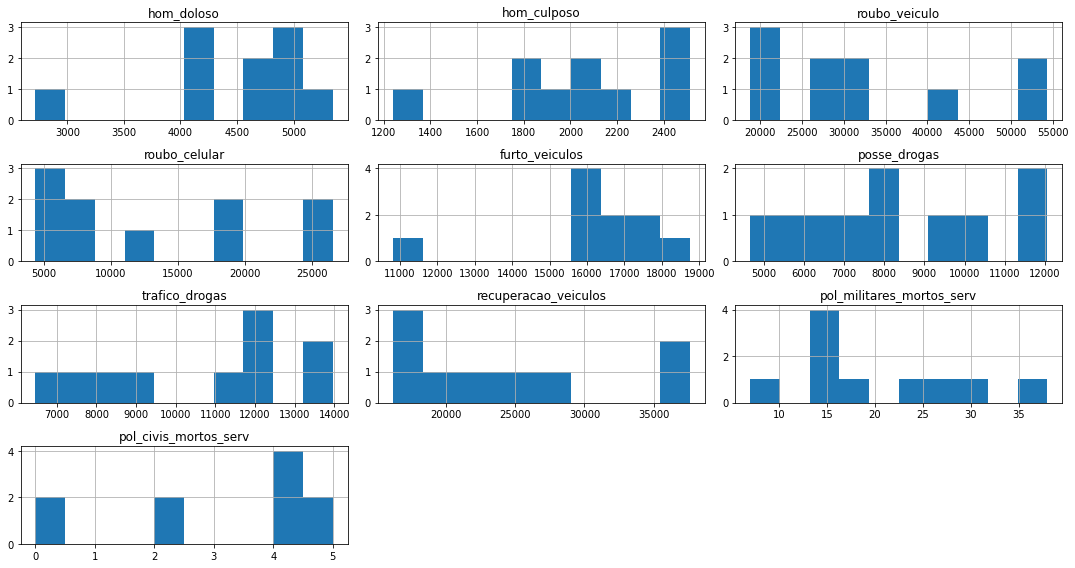

In [13]:
# Plotando o histograma das variáveis
df.sum(level=0).hist(figsize=(15,8));
plt.tight_layout()
plt.show()

*Observando os histogramas acima, não é possível verificar indícios da presença de outliers em alguma variável.*

#### Resumo estatístico

Segue abaixo o resumo estatístico de cada uma das variáveis do conjunto de dados.

In [14]:
# Resumo estatístico das variáveis
df.sum(level=0).describe()

,hom_doloso,hom_culposo,roubo_veiculo,roubo_celular,furto_veiculos,posse_drogas,trafico_drogas,recuperacao_veiculos,pol_militares_mortos_serv,pol_civis_mortos_serv
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4506.900000,2054.300000,32874.900000,13112.900000,16197.600000,8352.400000,10678.500000,24255.600000,20.400000,3.000000
std,747.713024,385.550126,12649.729522,8442.061905,2148.457803,2501.800028,2610.292927,7830.886046,9.442222,1.885618
min,2717.000000,1239.000000,18773.000000,4362.000000,10812.000000,4660.000000,6462.000000,16142.000000,7.000000,0.000000
25%,4219.750000,1827.250000,23549.250000,5845.750000,15729.500000,6502.000000,8566.000000,17931.250000,14.250000,2.000000
50%,4756.000000,2096.000000,29523.500000,9898.000000,16511.000000,7898.500000,11817.000000,22509.000000,17.000000,4.000000
75%,4948.000000,2357.750000,39434.750000,19326.750000,17487.000000,9796.500000,12364.250000,27824.250000,26.750000,4.000000
max,5346.000000,2513.000000,54366.000000,26538.000000,18752.000000,12063.000000,13961.000000,37630.000000,38.000000,5.000000


*Por meio do resumo estatístico das variáveis, também não é possível identificar indícios de outliers.*

####Boxplot

Por fim, para ter certeza da existência ou não de outliers no conjunto de dados, serão plotados os boxplot para cada variável.

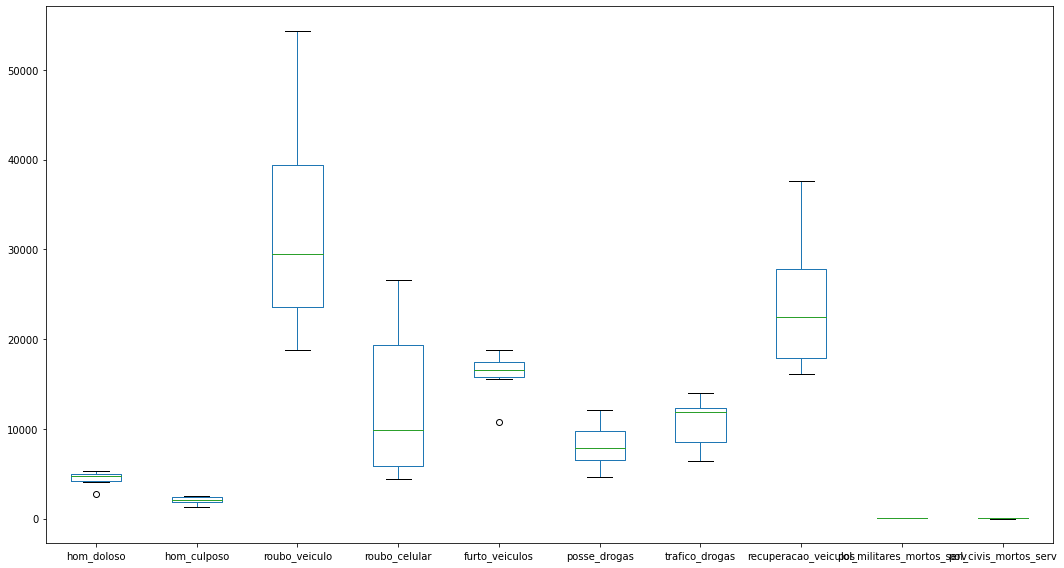

In [15]:
# Plotando o boxplot das variáveis
df.sum(level=0).plot(kind='box', figsize=(15,8));
plt.tight_layout()
plt.show()

*Como pode ser visto acima, apenas duas variáveis possuem outliers:* `hom_doloso` *e* `furto_veiculos`, *sendo que cada uma delas possui apenas 1 outlier cada. Portanto, visto ser uma quantidade bem pequena, não será necessário removê-los. Pois não irão atrapalhar a análise.*

###Extração de *insights*

Após essa breve análise estatística é possível extrair algumas informações, que podem ser obtidas, manipulando o conjunto de dados.

#### Número de ocorrências envolvendo drogas ao longo dos anos

In [16]:
# Definindo as variáveis para plotar a tabela de dados
anos = df.sum(level=0).index
crimes = ["Posse de drogas", "Tráfico de drogas"]

posse_drogas = df['posse_drogas'].sum(level=0).values
trafico_drogas = df['trafico_drogas'].sum(level=0).values

print(posse_drogas)
print(trafico_drogas)

[ 4660  6142  7834  9309 12063 12062  9959  7582  7963  5950]
[ 6462  7505  8917 11600 12428 13961 13256 12173 12034  8449]


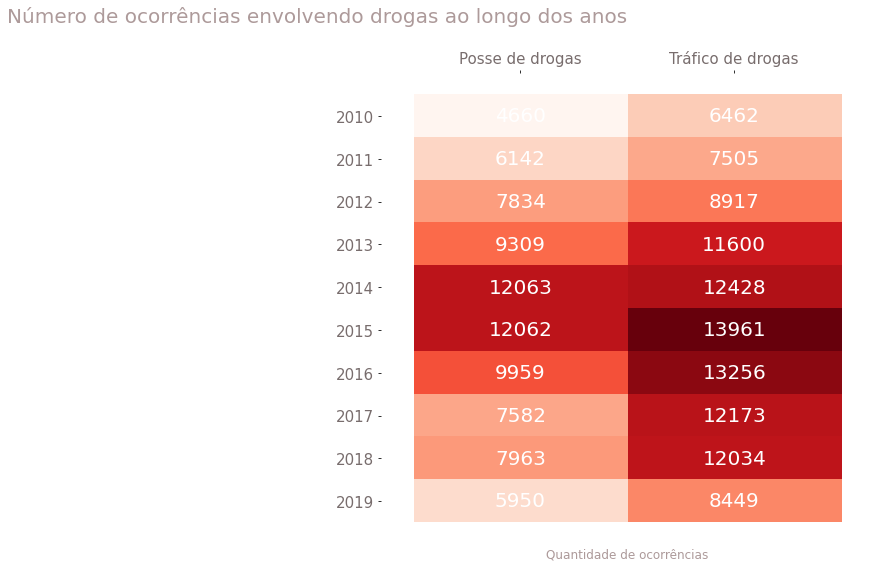

In [17]:
# Plotando a tabela com os dados de 'Posse de drogas' e 'Tráfico de drogas'
harvest = np.array([[4660,  6462],
                    [6142,  7505],
                    [7834,  8917],
                    [9309, 11600],
                    [12063,12428],
                    [12062,13961],
                    [9959, 13256],
                    [7582, 12173],     
                    [7963, 12034],
                    [5950, 8449]])


fig, ax = plt.subplots(figsize=(16,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

im = ax.imshow(harvest, aspect=0.2, cmap='Reds')

ax.set_xticks(np.arange(len(crimes)))
ax.set_yticks(np.arange(len(anos)))

ax.set_xticklabels(crimes, fontsize=15, color='#786d6d')
ax.set_yticklabels(anos, fontsize=15, color='#786d6d')

plt.setp(ax.get_xticklabels(), ha="center")

for i in range(len(anos)):
    for j in range(len(crimes)):
        text = ax.text(j, i, harvest[i, j], ha="center", va="center", color='#ffffff', fontsize='20')    

ax.set_title('Número de ocorrências envolvendo drogas ao longo dos anos\n', color='#ad9a9a', horizontalalignment='right', fontsize=20)

ax.margins(x = 0.075, y= 0.05)
ax.use_sticky_edges = False

ax.xaxis.tick_top()

plt.xlabel('Quantidade de ocorrências', color='#ad9a9a', size=12)

fig.tight_layout()
# plt.savefig('teste.jpeg', format='jpeg', quality=100, dpi = 300, bbox_inches='tight')
plt.show()

Na tabela acima, é possível identificar algumas informações:

* Durante toda a última década, o número de ocorrências de **tráfico de drogas** sempre foi maior que o número de ocorrências de **posse de drogas**.
* 2015 foi o ano com maior ocorrências de **tráfico de drogas**.
* 2014 foi o ano com maior ocorrências de **posse de drogas**.
* O número de casos de **tráfico de drogas** mais que dobrou entre 2010 e 2015.
* E o número de casos de **posse de drogas** quase triplicou, nesse mesmo período citado acima, entre 2010 e 2015.
* Apesar de em 2019 ambas as ocorrências apresentarem uma queda nos números, não se pode levá-las em consideração. Visto que, os dados de 2019 são apenas dos 8 primeiros meses do ano. Ou seja, o dataframe não possui os dados completos para esse último ano.

#### Número de homicídios no estado do Rio

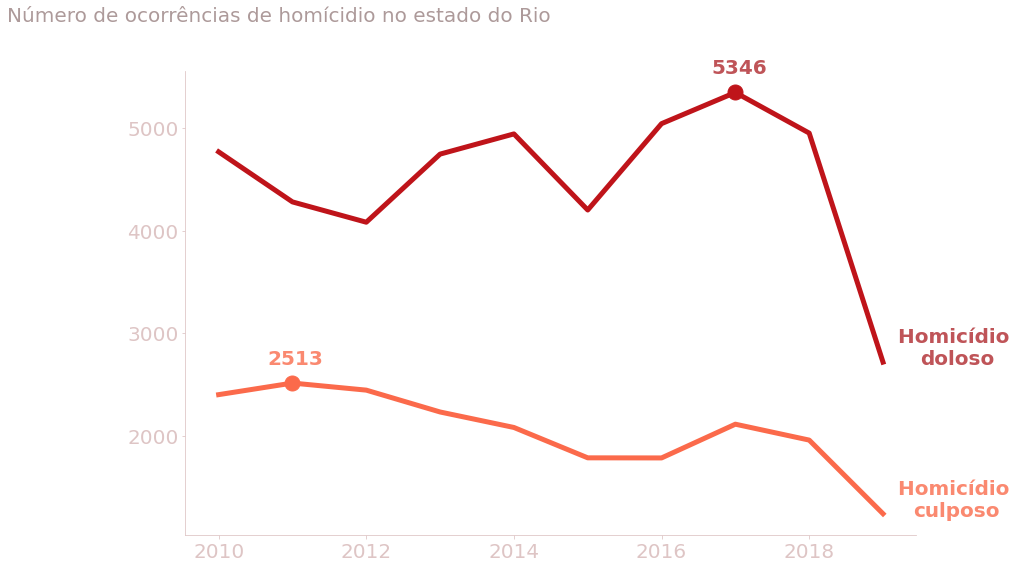

In [18]:
# Plotando o gráfico da quantidade de ocorrências de homicídio no Rio de Janeiro
fig, ax = plt.subplots(figsize=(14, 8))

line1, = ax.plot(df.sum(level=0).index, df.sum(level=0).hom_doloso, linewidth=5, color='#bf141a')
line2 = ax.plot(df.sum(level=0).index, df.sum(level=0).hom_culposo, linewidth=5, color='#fb6a4b')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#dec5c5')
ax.spines['left'].set_color('#dec5c5')
ax.tick_params(axis='x', colors='#dec5c5', labelsize=20)
ax.tick_params(axis='y', colors='#dec5c5', labelsize=20)
# plt.xticks(df.sum(level=0).index)

ax.plot(2017, df.sum(level=0).hom_doloso.max(), ".r", markersize=30, color='#bf141a')
ax.plot(2011, df.sum(level=0).hom_culposo.max(), ".r", markersize=30, color='#fb6a4b')

ax.annotate(int(df.sum(level=0).hom_doloso.max()), fontsize=20, weight='bold', xy=(2010.7, 2535), xytext=(2016.67, 5533), color='#bf5458')
ax.annotate(int(df.sum(level=0).hom_culposo.max()), fontsize=20, weight='bold', xy=(2010.7, 2535), xytext=(2010.66, 2700), color='#fa8970')

ax.annotate('Homicídio \ndoloso', fontsize=20, weight='bold', xy=(2010.7, 2535), xytext=(2020, 2697), color='#bf5458', ha='center')
ax.annotate('Homicídio \nculposo', fontsize=20, weight='bold', xy=(2010.7, 2535), xytext=(2020, 1219), color='#fa8970', ha='center')

ax.set_title('Número de ocorrências de homicídio no estado do Rio\n\n', color='#ad9a9a', horizontalalignment='right', fontsize=20)

fig.tight_layout()
# plt.savefig('teste.jpeg', format='jpeg', quality=100, dpi = 300, bbox_inches='tight')
plt.show()

Informações que podem ser identificadas:

* A quantidade de **homicídios dolosos** sempre foi maior que a quantidade de **homicídios culposos**, na última década.
* **2011 foi o ano com maior número de homicídios culposos**, aqueles onde não houve a intenção de matar. Foram contabilizados 2513 homicídios  desse tipo no ano.
* **2017 foi o ano com maior número de homicídios dolosos**, aqueles onde houve a intenção de matar. Foram contabilizados 5346 homicídios  desse tipo no ano. 
* A partir do ano de 2018, houve uma queda no número de ambos os tipos de homicídios. Porém, vale lembrar que o ano de 2019 não possui os dados de todos os meses, deixando essa previsão de queda um pouco incerta.

#### Veículos recuperados após roubo ou furto


In [19]:
# Calculando os valores de veículos recuperados de furtos ou roubos
percent_veiculos_recuperados = round((df.sum(level=0).recuperacao_veiculos / (df.sum(level=0).roubo_veiculo + df.sum(level=0).furto_veiculos) * 100), 0)
percent_veiculos_recuperados = percent_veiculos_recuperados.astype(int)
percent_veiculos_recuperados = dict(percent_veiculos_recuperados)

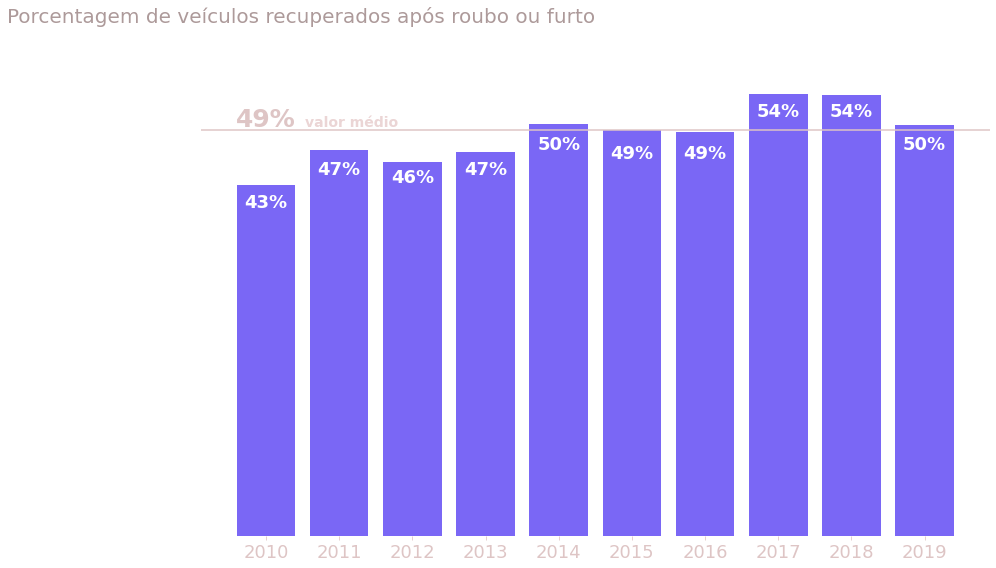

In [20]:
# Plotando o gráfico da quantidade de veículos recuperados no Rio de Janeiro
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(df.sum(level=0).index, (df.sum(level=0).recuperacao_veiculos / (df.sum(level=0).roubo_veiculo + df.sum(level=0).furto_veiculos) * 100), color='#7a67f5')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

ax.tick_params(axis='x', colors='#dec5c5', labelsize=18)

# fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
# yticks = mtick.FormatStrFormatter(fmt)
# ax.yaxis.set_major_formatter(yticks)

plt.xticks(df.sum(level=0).index)

ax.set_title('Porcentagem de veículos recuperados após roubo ou furto\n\n', color='#ad9a9a', horizontalalignment='right', fontsize=20)

ax.annotate('{}%'.format(percent_veiculos_recuperados[2010]), fontweight='bold', fontsize=18, xy=(2010, percent_veiculos_recuperados[2010] - 3), color='white', ha='center')
ax.annotate('{}%'.format(percent_veiculos_recuperados[2011]), fontweight='bold', fontsize=18, xy=(2011, percent_veiculos_recuperados[2011] - 3), color='white', ha='center')
ax.annotate('{}%'.format(percent_veiculos_recuperados[2012]), fontweight='bold', fontsize=18, xy=(2012, percent_veiculos_recuperados[2012] - 3), color='white', ha='center')
ax.annotate('{}%'.format(percent_veiculos_recuperados[2013]), fontweight='bold', fontsize=18, xy=(2013, percent_veiculos_recuperados[2013] - 3), color='white', ha='center')
ax.annotate('{}%'.format(percent_veiculos_recuperados[2014]), fontweight='bold', fontsize=18, xy=(2014, percent_veiculos_recuperados[2014] - 3), color='white', ha='center')
ax.annotate('{}%'.format(percent_veiculos_recuperados[2015]), fontweight='bold', fontsize=18, xy=(2015, percent_veiculos_recuperados[2015] - 3), color='white', ha='center')
ax.annotate('{}%'.format(percent_veiculos_recuperados[2016]), fontweight='bold', fontsize=18, xy=(2016, percent_veiculos_recuperados[2016] - 3), color='white', ha='center')
ax.annotate('{}%'.format(percent_veiculos_recuperados[2017]), fontweight='bold', fontsize=18, xy=(2017, percent_veiculos_recuperados[2017] - 3), color='white', ha='center')
ax.annotate('{}%'.format(percent_veiculos_recuperados[2018]), fontweight='bold', fontsize=18, xy=(2018, percent_veiculos_recuperados[2018] - 3), color='white', ha='center')
ax.annotate('{}%'.format(percent_veiculos_recuperados[2019]), fontweight='bold', fontsize=18, xy=(2019, percent_veiculos_recuperados[2019] - 3), color='white', ha='center')

ax.axhline((df['recuperacao_veiculos'].mean() / (df['roubo_veiculo'].mean() + df['furto_veiculos'].mean()) * 100), color='#dec5c5', alpha=1)
ax.annotate('49%', fontweight='bold', fontsize=25, xy=(2010, 49.8), color='#dec5c5', ha='center')
ax.annotate('valor médio', fontweight='bold', fontsize=14, xy=(2011.8, 49.8), color='#ebd5d5', ha='right')

fig.tight_layout()
# plt.savefig('teste.jpeg', format='jpeg', quality=100, dpi = 300, bbox_inches='tight')
plt.show()

Informações que podem ser identificadas:

* O número de veículos que são recuperados após roubo ou furto, vem crescendo ao longo da última década.
* Em 2010 a taxa de **veículos recuperados** era de 43%, e a partir de 2017 essa mesma taxa vem ultrapassando 50%.
* Sendo 49% a média de veículos que são recuperados após roubo ou furto.

#### Quantidade de policiais mortos em serviço 

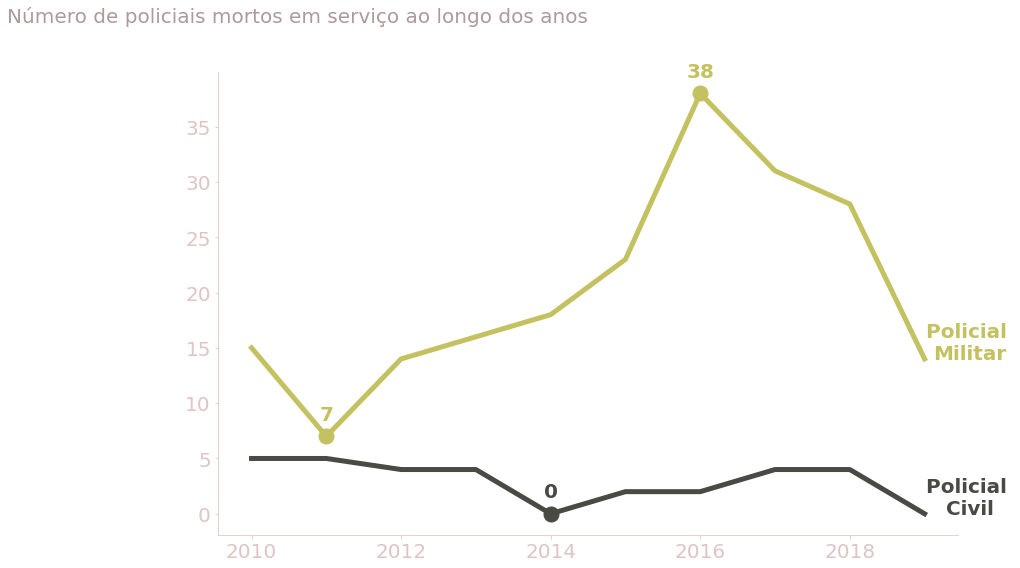

In [21]:
# Plotando o gráfico da quantidade de policiais mortos em serviço no Rio de Janeiro
fig, ax = plt.subplots(figsize=(14, 8))

line1, = ax.plot(df.sum(level=0).index, df['pol_civis_mortos_serv'].sum(level=0), linewidth=5, color='#4a4a45')
line2 = ax.plot(df.sum(level=0).index, df['pol_militares_mortos_serv'].sum(level=0), linewidth=5, color='#c4c160')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#dec5c5')
ax.spines['left'].set_color('#dec5c5')
ax.tick_params(axis='x', colors='#dec5c5', labelsize=20)
ax.tick_params(axis='y', colors='#dec5c5', labelsize=20)

ax.plot(2014, df['pol_civis_mortos_serv'].sum(level=0).min(), ".r", markersize=30, color='#4a4a45')
ax.plot(2011, df['pol_militares_mortos_serv'].sum(level=0).min(), ".r", markersize=30, color='#c4c160')
ax.plot(2016, df['pol_militares_mortos_serv'].sum(level=0).max(), ".r", markersize=30, color='#c4c160')

ax.annotate(int(df['pol_civis_mortos_serv'].sum(level=0).min()), fontsize=20, weight='bold', xy=(2010.7, 10), xytext=(2013.91, 1.5), color='#4a4a45')
ax.annotate(int(df['pol_militares_mortos_serv'].sum(level=0).min()), fontsize=20, weight='bold', xy=(2010.7, 10), xytext=(2010.91, 8.5), color='#c4c160')
ax.annotate(int(df['pol_militares_mortos_serv'].sum(level=0).max()), fontsize=20, weight='bold', xy=(2010.7, 10), xytext=(2015.82, 39.5), color='#c4c160')

ax.annotate('Policial \nMilitar', fontsize=20, weight='bold', xy=(2019, 14), xytext=(2019.6, 14), color='#c4c160', ha='center')
ax.annotate('Policial \nCivil', fontsize=20, weight='bold', xy=(2019, 0), xytext=(2019.6, 0), color='#4a4a45', ha='center')

ax.set_title('Número de policiais mortos em serviço ao longo dos anos\n\n', color='#ad9a9a', horizontalalignment='right', fontsize=20)

fig.tight_layout()
# plt.savefig('teste.jpeg', format='jpeg', quality=100, dpi = 300, bbox_inches='tight')
plt.show()

Informações que podem ser identificadas:

* O número de **policiais militares** mortos em serviço sempre foi maior que o número de **policiais civis** mortos em serviço, na última década.
* A quantidade de policiais militares mortos veio aumentando até atingir o pior número, em **2016**, onde **38 policiais militares foram mortos** em serviço.
* A quantidade de policiais civis mortos oscilou bem pouco ao longo dos anos. E em **2014 nenhum policial civil foi morto** em serviço.

#### Incidência de roubo de celulares no estado do Rio

In [22]:
# Coletando os números de roubos de celulares no Rio de Janeiro
roubo_celular_values = df['roubo_celular'].sum(level=0).values
roubo_celular_values = roubo_celular_values.astype(int)

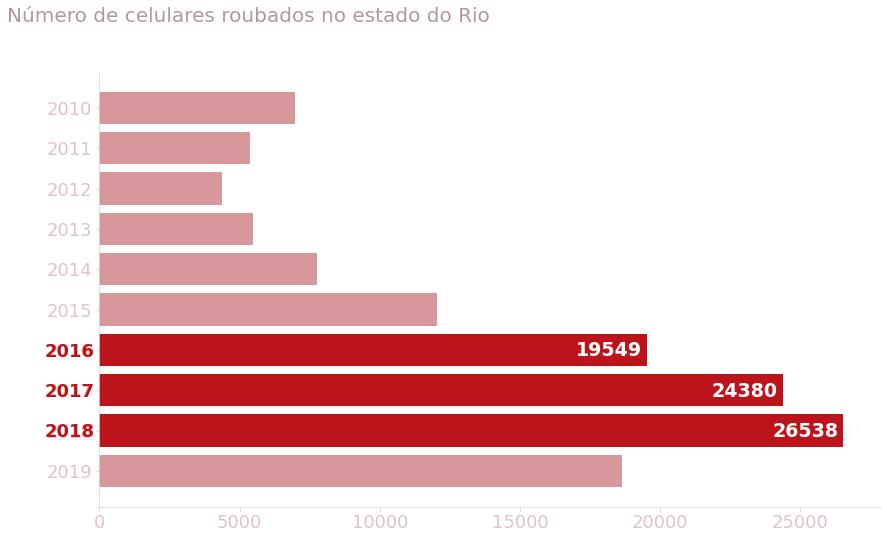

In [23]:
# Plotando o gráfico da quantidade de celulares roubados no Rio de Janeiro
fig, ax = plt.subplots(figsize=(14, 8))

ax.barh(df.sum(level=0).index, roubo_celular_values, align='center', color=['#d6989a','#d6989a','#d6989a','#d6989a','#d6989a','#d6989a','#bc141a','#bc141a','#bc141a','#d6989a'])

# ax.barh(distritos_mais_caros, distritos_mais_caros_values, align='center', color=['#0AA439', '#23C554', '#54E07E', '#98F3B4', '#CDFCDB'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#d9d9d9')
ax.spines['left'].set_color('#d9d9d9')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.invert_yaxis()  # labels read top-to-bottom
ax.tick_params(axis='x', colors='#786d6d')
ax.tick_params(axis='y', colors='#786d6d')

plt.yticks(df.sum(level=0).index)
ax.set_title('Número de celulares roubados no estado do Rio\n\n', color='#ad9a9a', horizontalalignment='right', fontsize=20)
ax.tick_params(axis='x', colors='#dec5c5', labelsize=18)
ax.tick_params(axis='y', colors='#dec5c5', labelsize=18,)

ax.annotate(roubo_celular_values[8], fontsize=19, fontweight='bold', xy=(20000, 2010), xytext=(24000, 2018.15), color='#fff', ha='left')
ax.annotate(roubo_celular_values[7], fontsize=19, fontweight='bold', xy=(20000, 2010), xytext=(21842, 2017.15), color='#fff', ha='left')
ax.annotate(roubo_celular_values[6], fontsize=19, fontweight='bold', xy=(20000, 2010), xytext=(17011, 2016.15), color='#fff', ha='left')

ax.annotate(2016, fontsize=18, fontweight='bold', xy=(20000, 2010), xytext=(-1950, 2016.16), color='#bc141a', ha='left')
ax.annotate(2017, fontsize=18, fontweight='bold', xy=(20000, 2010), xytext=(-1950, 2017.16), color='#bc141a', ha='left')
ax.annotate(2018, fontsize=18, fontweight='bold', xy=(20000, 2010), xytext=(-1950, 2018.16), color='#bc141a', ha='left')

# plt.savefig('grafico-localidades-mais-caras-em-nova-york.jpeg', format='jpeg', quality=100, dpi = 300, bbox_inches='tight')
plt.show()

Informações que podem ser identificadas:

* O número de ocorrências de **roubo de celular** vem aumentando bastante na última década, no estado do Rio.
* De 2010 para 2018, o **número de ocorrências desse tipo de crime mais que triplicou**.
* O ano com maior número de roubos foi em **2018**, onde **26538 celulares foram subtraídos**.
* 2019 apresenta uma queda no número de ocorrências. Porém, como já explicado anteriormente, o ano de 2019 não possui os dados de todos os meses. E mesmo com essa ausência de dados, o número de celulares roubados em 2019 foi maior que o número desses roubos em todos os anos anteriores à 2016.

##Conclusão

Como contextualizado neste notebook, o problema de segurança pública é algo recorrente em grande parte dos centros urbanos. O medo e a insegurança são sentimentos presentes na vida dos moradores dessas localidades.

No estado do Rio de Janeiro não é diferente. Local com inúmeras praias, pontos turísticos e belezas naturais, mas que ainda sofre com o crime organizado. Utilizando a base de dados do Instituto de Segurança Pública do Rio de Janeiro, foi possível extrair algumas informações importantes sobre as ocorrências de determinados tipos de crimes no estado.

O número de ocorrências de posse de drogas quase triplicou no período entre 2010 e 2015. E durante toda a última década, o número de casos de tráfico de drogas sempre foi maior que o número de casos de posse de drogas. Sendo 2014 e 2015 os anos com maiores ocorrências de posse e tráfico de drogas, respectivamente.

2011 foi o ano que registrou o maior número de homicídios culposos no estado, foram 2514. Já em 2017 foram contabilizados 5346 casos de assassinato, e foi o ano com pior número. Esses números só começaram a apresentar uma queda no ano de 2018.

O número de veículos que foram recuperados após casos de roubo ou furto, veio crescendo gradativamente ao longo da década. Passou de uma taxa de 43% em 2010, para mais de 50% de veículos recuperados em 2019.

Mais uma triste estatística, que é sobre o número de policiais mortos em serviço. Ao longo de toda a década foi possível observar que o número de policiais militares sempre foi maior que o número de policiais civis mortos em serviço. O pior ano foi em 2016, onde 38 policiais militares foram mortos em trabalho.

Também foi observado que o número de roubo de celulares vem aumentando bastante na última década no estado do Rio. De 2010 para 2018, o número de ocorrências desse tipo de crime mais que triplicou. Sendo que em 2018, 26538 celulares foram roubados em todo o estado.

Por fim, cabe ressaltar que esse *dataset* utilizado na análise é uma versão resumida, ideal apenas para uma abordagem inicial. Para uma análise exploratória mais aprofundada, recomenda-se que seja usado o conjunto de dados completos.

Esse notebook foi desenvolvido para fins didáticos, para colocar em prática os conhecimentos adquiridos no **Curso de Data Science na Prática** da [Sigmoidal](https://sigmoidal.ai/) (Escola de Data Science e Machine Learning).



## Referências

FARIA, Ícaro Corrêa G. Segurança pública brasileira: responsáveis, números e desafios. Politize, 2018. Disponível em: <https://www.politize.com.br/seguranca-publica-brasileira-entenda/>. Acesso em: 03 de fev. de 2021.

PENA, Rodolfo Alves. Rio de Janeiro. Brasil Escola. Disponível em: <https://brasilescola.uol.com.br/brasil/rio-janeiro.htm>. Acesso em: 03 de fev. de 2021.

SALATIEL, José Renato. Violência no Rio de Janeiro - Desafio do Estado é vencer o tráfico. Uol. Disponível em: <https://vestibular.uol.com.br/resumo-das-disciplinas/atualidades/violencia-no-rio-de-janeiro-desafio-do-estado-e-vencer-o-trafico.htm>. Acesso em: 03 de fev. de 2021. 

CIDADES e Estados. IBGE. Disponível em: <https://www.ibge.gov.br/cidades-e-estados/rj.html>. Acesso em: 03 de fev. de 2021.

CRISTO Redentor. Riotur. Disponível em: <http://visit.rio/que_fazer/cristoredentor/>. Acesso em: 03 de fev. de 2021.